In [1]:
def compute_field_element_from_fraction(num, den, p):
    inv_den = pow(den, -1, p)
    return (num * inv_den) % p


In [2]:
# Fractions in finte field. Validating arith. circuit w/ rational answers
# E.g.: the field is:
# x + y + z === 1;
# x === y;
# y === z;

p = 11 # Over a finite field of characteristic 11.

# x, y, z have value 1/3
x = pow(3, -1, 11)
y = pow(3, -1, 11)
z = pow(3, -1, 11)

assert x == y;
assert y == z;
assert (x + y + z) % p == 1

In [10]:
# We can use library called galios (gal-wah)
# Finite fields are also call "Galios Fields"
import galois

GF7 = galois.GF(7) 

one_half = GF7(1) / GF7(2)
one_third = GF7(1) / GF7(3)
five_over_six = GF7(5) / GF7(6)

assert one_half + one_third == five_over_six
print(one_half, one_third, five_over_six)

4 5 7


In [11]:
# Multiplication of fractions is also consistent in GF

GF17 = galois.GF(17)

three_fourth = GF17(3) / GF17(4)
one_half = GF17(1) / GF17(2)
three_eighth = GF17(3) / GF17(8)

assert three_fourth * one_half == three_eighth
print(three_fourth, one_half, three_eighth)

5 9 11


### a × b ≠ 0 for all nonzero a, b

So, $x_1 * x_2 * ... * x_n \neq 0$ means that none of the $x_i$ are 0. 

And example of usage of this property is say we have signals $x_1, x_2, x_3$ and atleast one has to be $k$. Then, over some finite field, $(x_1 + add-inv(k))(x_2 + add-inv(k))(x_3 + add-inv(k)) === 0$ which is equivalent to $(x_1 - 8)(x_2 - 8)(x_3 - 8) === 0$ in normal arithmatic circuits.

In [12]:
# Square root modulo p
# There are two root for a give number which are additive inverse of each other.
# NOT all numbers have root in GF(p)

# We use libnum library
# install libnum with `python -m pip install libnum`
from libnum import has_sqrtmod_prime_power, sqrtmod_prime_power
has_sqrtmod_prime_power(5, 11, 1) # True
list(sqrtmod_prime_power(5, 11, 1)) # [4, 7]

[4, 7]

When $p = 4k + 3$, the square root can be calculated as $x ^ e\ \%\ p$

If not of above form, then Tonelli-Shanks algo is used (implemented by libnum)

In [18]:
def mod_sqrt(x, p):
    assert (p - 3) % 4 == 0, "prime not 4k + 3"
    exponent = (p + 1) // 4
    return pow(x, exponent, p) # x ^ e % p
# This does not check if a sqrt for given x exists or not!

Polynomials and equations in using galios library.

If a linear eq has no soln or one soln or inf soln in real space, it DOES NOT mean it is true for that system of eq in finite space of p.

E.g.: $x + 2y = 3$ and $4x + 8y = 1$. These have no soln in real space but 11 solutions in GF(11)

In [21]:
# Galios library does many of the polynomials operations.

GF103 = galois.GF(103)

# x^2 + 2x -1 with p = 103
p1 = galois.Poly([1, 2, -1], GF103)
print("p1:", p1)  # galios library automatically converts the -1 to it's additive inverse

# x^2 + x + 1 with p = 103
p2 = galois.Poly([1, 1, 1], GF103)

print("p2:", p2)

# p1 + p2 and p1*p2
print("p1 + p2:", p2 + p2)
print("p1 * p2", p1 * p2)

p1: x^2 + 2x + 102
p2: x^2 + x + 1
p1 + p2: 2x^2 + 2x + 2
p1 * p2 x^4 + 3x^3 + 2x^2 + x + 102


Finding roots of polynomials over finite field is difficult. https://en.wikipedia.org/wiki/Factorization_of_polynomials_over_finite_fields.

The galios library can calculate the root with `roots` function

In [22]:
print((p1 * p2).roots())

[37 46 56 64]


In [24]:
# Very time consuming
# gg = galois.GF(21888242871839275222246405745257275088548364400416034343698204186575808495617)

In [1]:
# p = galois.Poly([1, 2, -8], gg)

# print(p.roots())

## Finite Fields
Given a prime number $p$, we can make a finite field with $p$ elements by taking the set of integers${0, 1, 2, ..., p-1}$ and define addition and multiplication to be done modulo $p$.

## Group Theory
A group is a set with:
1. a closed binary operator
2. the binary operator is also associative
3. an identity element
4. every element having an inverse

An Abelian group has the additional requirement that the binary operator is commutative.

## Homomorphism 
Suppose we have two algebraic data structures $(A, □)$ and $(B, ■)$, where the binary operator of $A$ is □ and the binary operator of $B$ is ■.

A homomorphism from $A$ to $B$ exists if and only if $\exists$ a function $\phi: A \to B$ such that

$$\phi(a_i\ □\ a_j) = \phi(a_i)\ ■\ \phi(a_j)\ \forall a_i, a_j\ \epsilon\ A $$


In other words, if $a_i\ □ \ a_j\ = \ a_k$, then $\phi(a_i)\ ■\ \phi(a_j)\ =\ \phi(a_k)$.

Note that homomorphism is one directional.

### Homomorphic Encryption
If $\phi$ is computationally difficult to invert, then $\phi$ homomorphically encrypts the elements of $A$.

Zero Knowledge Examples:
1. Suppose we wish to prove to a verifier that we computed $2 + 3 = 5$ . We would give the verifier $(x, y, 5)$ where $x = \phi(2),\ y = \phi(3)$ and the verifier check that:
$x\ ■\ y = \phi(5)$.
Note that homomorphic encryption implies that the verifier knows the function $\phi$.

In these examples, note that we didn’t say anything about what elements of $B$ are or what ■ is. $B$ can be scary mathematical objects, and ■
can be a scary mathematical operator, but that doesn’t matter.

This is the beauty of abstract algebra: we don’t need to know. As long as it has the properties we care about, we can reason about its behavior even if we know nothing about the implementation.


“Elliptic curve points in a finite field under addition are a finite cyclic group and integers under addition are homomorphic to this group.”

You probably don’t know what elliptic curve points are or what adding them means, but you do know:
1. The set of elliptic curve points under addition produces another elliptic curve point.
2. The binary operator that takes two elliptic curve points and returns another elliptic curve point is associative.
3. The set of elliptic curve points contains an identity element.
4. The elliptic curve group has an identity element, which is unique.
5. Each elliptic curve point has an inverse such that adding a point and its inverse produces the identity.
6. Because the group is cyclic, every elliptic curve point can be generated by repeatedly applying the binary operator to some generator element.
7. Because the group of elliptic curve points is cyclic, it is also an abelian group.
8. Because it is a finite group, the order is finite.
9. Because of the homomorphism, we have a strong idea of how the binary operator for elliptic curve points behaves. We can use the elliptic curve point binary operator to “add integers” in a certain sense.

## Elliptic Curves

Elliptic curves are a family of curves which have the formula

$$y^2 = x^3 + ax + b$$

The set of points on an elliptic curve form a GROUP under elliptic curve point addition.

As long as x is not “perfectly vertical” if it crosses two points on the curve, it will always cross a third. 
Or more technically,
If a straight line crosses an elliptic curve at exactly two points, and neither of the intersection points are tangent intersections, then it must be perfectly vertical.

### Inverse of Point
The inverse of an elliptic curve point is the negative of the y value of the pair. That is, the inverse of $(x,y)$ is $(x, -y)$ and vice versa. Drawing a line through such points creates a perfectly vertical line.

### Identity Element
The identity element is the “point at infinity” we alluded to earlier is simply the point “way up there” when we draw a vertical line.

### Formula for Addition
Given two point
$$
P_1 = (x_1, y_1) \newline
P_2 = (x_2, y_2)
$$
then $P_3 = P_1 \oplus P_2$ is:
$$
\lambda = \frac{y_2 - y_1}{x_2 - x_1}
\newline
x_3 = \lambda^2 - x_1 - x_2
\newline
y_3 = \lambda(x_3 - x1) - y_1
$$

### Algebriacally demonstrating commutativity and associativity:
$$
T \oplus U = U \oplus T
\newline
Let,\ P = T \oplus U\ and\ Q = U \oplus T
\newline
$$

$$
var("y_t", "y_u", "x_t", "x_u")\\
lambda_p = (y_u - y_t)/(x_u - x_t)\\
x_p = lambda_p^2 - x_t - x_u\\
y_p = (lambda_p*(x_t - x_p) - y_t)\\

lambda_q = (y_t - y_u)/(x_t - x_u)\\
x_q = lambda_q^2 - x_u - x_t\\
y_q = (lambda_q*(x_u - x_q) - y_u)\\
$$

## Shortcut for point multiplication

What if we wanted to compute $1000A$ instead of $2A$ ? It would seem this is an $O(n)$ operation, but it isn’t.
Because of associativity, we can write $1000A$ as:
$$
1000A = 512A \oplus 256A \oplus 128A \oplus 64A \oplus 32A \oplus 8A
$$

$512A$ (and the other terms) can be computed quickly because 512 is just $A$ doubled 9 times.

This is actually an important property when we get to cryptography:

We can efficiently multiply an elliptic curve point by a large integer efficiently.

## Elliptic curve over Finite Field

We take the interget valus of x that result in interger y modulo some prime $p$.
In practise (for cryptography) p is usually 200 bits long. Also, this et of point modulo $p$ form a cyclic group, which is very useful.



## BN128 curve

The BN128 curve, which is used by the Ethereum precompiles to verify ZK proofs, is specified as follows:
$$
p = 21888242871839275222246405745257275088696311157297823662689037894645226208583
\newline
y^2 = x^3 + 3 (mod p)
$$

Note that `field_modulus` $p$ is not the same or order of curve order (i.e. number of points in the EC finte field)

## Modular square root

As discussed previously, we simply use `libnum` library to compute square root mod $p$. If $a = 4k + 3$ then, the square root is $pow(a, k + 1, p)$. Else we use `Tonelli-Shanks algorithm`.

## Generating points of EC group

Now as we know how to get square root mod $p$, we will simply calculate the square root of $x^3 + 3\ mod\ p$.

[]

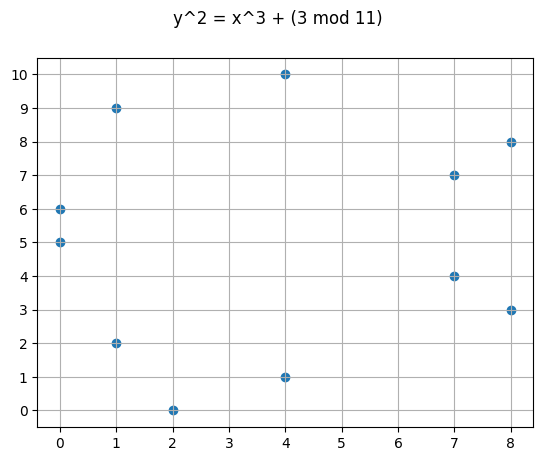

In [8]:
import libnum
import matplotlib.pyplot as plt

def generate_points(p):
    xs = []
    ys = []
    
    def y_squared(x):
        return (x**3 + 3) % p
    
    for x in range(0, p):
        if libnum.has_sqrtmod_prime_power(y_squared(x), p):
            roots = libnum.sqrtmod_prime_power(y_squared(x), p)
        
            for r in roots:
                xs.append(x)
                ys.append(r)
    return xs, ys

p = 11
xx, yy = generate_points(p)

# Plot the points
fig, (ax1) = plt.subplots(1, 1)
fig.suptitle(f"y^2 = x^3 + (3 mod {p})")
# fig.set_size_inches(10,10)
ax1.set_xticks(range(0, p))
ax1.set_yticks(range(0, p))
plt.grid()
plt.scatter(xx, yy)
plt.plot()


## Elliptic curve point addition

Picking two points from the plots above, then plugging them into the code below to add points and seeing they always land on another point (or the point on infinity if the points are inverses of each other).

In [1]:
## Elliptic curve point addition for curve y^2 = x^3 + 3

def double(x, y, a, p):
    """When we add points w/ same x and y. I.e. we compute 2*P"""
    lambd = (((3 * x**2) % p) * pow(2 * y, -1, p)) % p
    xx = (lambd**2 - 2*x) % p
    yy = (-lambd * xx + lambd * x - y) % p
    return (xx, yy)

def add_points(p1, p2, p, a=0):
    """
    p1: tuple of (x1, y1)
    p1: tuple of (x2, y2)
    p: prime/field_modular number
    """
    if p1[0] == p1[1] == None:
        # I.e. infinity point or identity point
        return p2
    if p2[0] == p2[1] == None:
        # I.e. infinity point or identity point
        return p1

    assert (p1[0]**3 + 3) % p == p1[1]**2 % p, "p1 not on curve"
    assert (p2[0]**3 + 3) % p == p2[1]**2 % p, "p2 not on curve"

    if p1 == p2:
        # Same point added twice
        return double(p1[0], p2[1], a, p)
    elif p1[0] == p2[0]:
        # Same x, meaning y will be inverted i.e. both points are inverse of each other
        return (None, None)
    
    lambd = ((p1[1] - p2[1]) * pow(p1[0] - p2[0], -1, p)) % p
    xx = (lambd**2 - p1[0] - p2[0]) % p
    yy = (lambd*(p2[0] - xx) - p2[1]) % p
    return (xx, yy)


In [3]:
# Generating points from "G" generator

# for our purposes, (4, 10) is the generator point G
G = (4, 10)
p = 11
next_point = G
print(1, G)
points = [G]
for i in range(2, 12):
    # There are 12 points in the finite field modulo 11
    next_point = add_points(next_point, G, p)
    print(i, next_point)
    points.append(next_point)

# If we add G 2 more times then we reach the identity element and the cycle of points repeat
next_point = add_points(next_point, G, p)
print(12, next_point)
next_point = add_points(next_point, G, p)
print(13, next_point)

1 (4, 10)
2 (7, 7)
3 (1, 9)
4 (0, 6)
5 (8, 8)
6 (2, 0)
7 (8, 3)
8 (0, 5)
9 (1, 2)
10 (7, 4)
11 (4, 1)
12 (None, None)
13 (4, 10)


### If the number of points is prime, then the addition of points behaves like a finite field

I.e. for $p = 11$, we have $12$ points, which is not prime but for $p = 43$, we have $31$ points in the finite field of EC which is prime. Hence, when the order of the curve(no of points on the curve % p) matches the order of the finite field (no of points of order of curve) every operation you do in the **finite field has a homomorphic equivalent in the elliptic curve.**

## Python bn128 library

We use `py_ecc` library. Install by `python -m pip install py_ecc`

The `field_modulus` is the modulo we do the curve over. The `curve_order` is the number of points on the curve

In [8]:
from py_ecc.bn128 import G1, multiply, add, eq, neg, curve_order, field_modulus

print(G1)

print(add(G1, G1))

# Multiplication is always w/ some scalar (or integer)
assert eq(multiply(G1, 5), add(multiply(G1, 2), multiply(G1, 3)))

# Inverse if calculated using `neg` function
p1 = multiply(G1, 4)
p1_inv = neg(p1)

print("Point + it's inverse:", add(p1, p1_inv))

print("Curve Order: ", curve_order)
print("Field Modulus: ", field_modulus)

(1, 2)
(1368015179489954701390400359078579693043519447331113978918064868415326638035, 9918110051302171585080402603319702774565515993150576347155970296011118125764)
None
Curve Order:  21888242871839275222246405745257275088548364400416034343698204186575808495617
Field Modulus:  21888242871839275222246405745257275088696311157297823662689037894645226208583


In [6]:
# Encoding ration numbers

# NOTE: We use the curve order and not the field modulus

five_over_two = (5 * pow(2, -1, curve_order)) % curve_order
one_half_ec = pow(2, -1, curve_order)

assert eq(add(multiply(G1, five_over_two), multiply(G1, one_half_ec)), multiply(G1, 3))


This is most important thing to remember for this lesson:

**Elliptic curves over finite fields homomorphically encrypt addition in a finite field.**

The security of using EC lies in the *discrete logarithm problem*:
**A scalar multiplied by a point will result in another point, and it is infeasible in general to calculate the scalar given the elliptic curve point.**